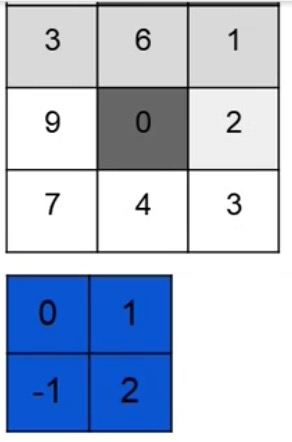

In [2]:
import numpy as np
l = np.array([[5,3,4], [1,0,0], [3,6,1], [9,0,2], [7,4,3]])
f = np.array([[0,1], [-1,2]])
print(l.shape)
print(f.shape)

op = np.zeros((l.shape[0]-f.shape[0]+1,l.shape[1]-f.shape[1]+1))
op

(5, 3)
(2, 2)


array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [3]:
def conv(image, f, b=0):
    
    s = np.multiply(image, f)
    Z = np.sum(s)
    return Z


i = np.array([[5,3,4],[1,0,0],[3,6,1],[9,0,2],[7,4,3]])
f = np.array([[0,1],[-1,2]])
padding = 0
stride = 1
xo = int((i.shape[0] - f.shape[0]) + 1)
yo = int((i.shape[1] - f.shape[1]) + 1)

output = np.zeros((xo, yo))

for y in range(i.shape[1]):
  if y > i.shape[1]- f.shape[1]: 
    break
  for x in range(i.shape[0]):

    if x > i.shape[0] - f.shape[0]:
        break
    try:
      output[x, y] = conv(i[x: x + f.shape[0], y: y + f.shape[1]],f)
    except:
        break
print(output)

[[ 2.  4.]
 [ 9. -4.]
 [-3.  5.]
 [ 1.  4.]]


In [5]:
def conv_with_padding_stride(input, f, b,padding = ((1,0),(1,0)),stride= 1): #(Col_before, Col_after),(row_before, row after)
    print("Original Input: \n", input)
    if padding !=0:
      input_pad = np.pad(input, padding, 'constant', constant_values=0)
      print("Padded Input: \n", input_pad)
    else:
      input_pad = input
    xo = int(((input_pad.shape[0] - f.shape[0] ) ) + 1)
    yo = int(((input_pad.shape[1] - f.shape[1] ) ) + 1)

    output = np.zeros((xo, yo))
    for y in range(input_pad.shape[1]):
      if y > input_pad.shape[1]- f.shape[1]: 
        break
      for x in range(input_pad.shape[0]):        
        if x > input_pad.shape[0] - f.shape[0]:
          break
        try:
            output[x, y] = np.multiply(input_pad[x: x + f.shape[0], y: y + f.shape[1]],f).sum() + float(b)
            print("At conv (",y,",",x,"): \n", output)
        except:
            break
    return output

i = np.array([[5,3,4],[1,0,0],[3,6,1],[9,0,2],[7,4,3]])
f = np.array([[0,1],[-1,2]])
padding = 0
stride = 1
padx = (f.shape[0]-1)/2
pady = (f.shape[1]-1)/2
output = conv_with_padding_stride(i,f,0)
print(output)

Original Input: 
 [[5 3 4]
 [1 0 0]
 [3 6 1]
 [9 0 2]
 [7 4 3]]
Padded Input: 
 [[0 0 0 0]
 [0 5 3 4]
 [0 1 0 0]
 [0 3 6 1]
 [0 9 0 2]
 [0 7 4 3]]
At conv ( 0 , 0 ): 
 [[10.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
At conv ( 0 , 1 ): 
 [[10.  0.  0.]
 [ 7.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
At conv ( 0 , 2 ): 
 [[10.  0.  0.]
 [ 7.  0.  0.]
 [ 7.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
At conv ( 0 , 3 ): 
 [[10.  0.  0.]
 [ 7.  0.  0.]
 [ 7.  0.  0.]
 [21.  0.  0.]
 [ 0.  0.  0.]]
At conv ( 0 , 4 ): 
 [[10.  0.  0.]
 [ 7.  0.  0.]
 [ 7.  0.  0.]
 [21.  0.  0.]
 [23.  0.  0.]]
At conv ( 1 , 0 ): 
 [[10.  1.  0.]
 [ 7.  0.  0.]
 [ 7.  0.  0.]
 [21.  0.  0.]
 [23.  0.  0.]]
At conv ( 1 , 1 ): 
 [[10.  1.  0.]
 [ 7.  2.  0.]
 [ 7.  0.  0.]
 [21.  0.  0.]
 [23.  0.  0.]]
At conv ( 1 , 2 ): 
 [[10.  1.  0.]
 [ 7.  2.  0.]
 [ 7.  9.  0.]
 [21.  0.  0.]
 [23.  0.  0.]]
At conv ( 1 , 3 ): 
 [[10.  1.  0.]
 [ 7.  2.  0.]
 [ 7.  9.  0.]
 [21. -3.  